In [1]:
# Diabetes Prediction

In [ ]:
# data set link - https://www.dropbox.com/s/uh7o7uyeghqkhoy/diabetes.csv?dl=0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("//content//diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.shape

(768, 9)

In [73]:
df.size

6912

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [68]:
df['Age'].nunique()

52

In [69]:
df['Insulin'].nunique()

186

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Visualisation

<Axes: xlabel='Outcome', ylabel='count'>

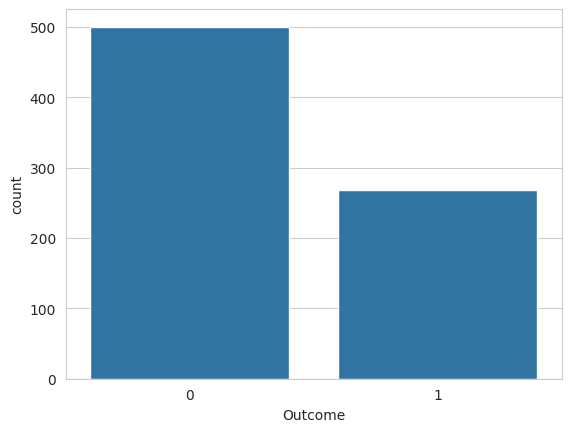

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=df)

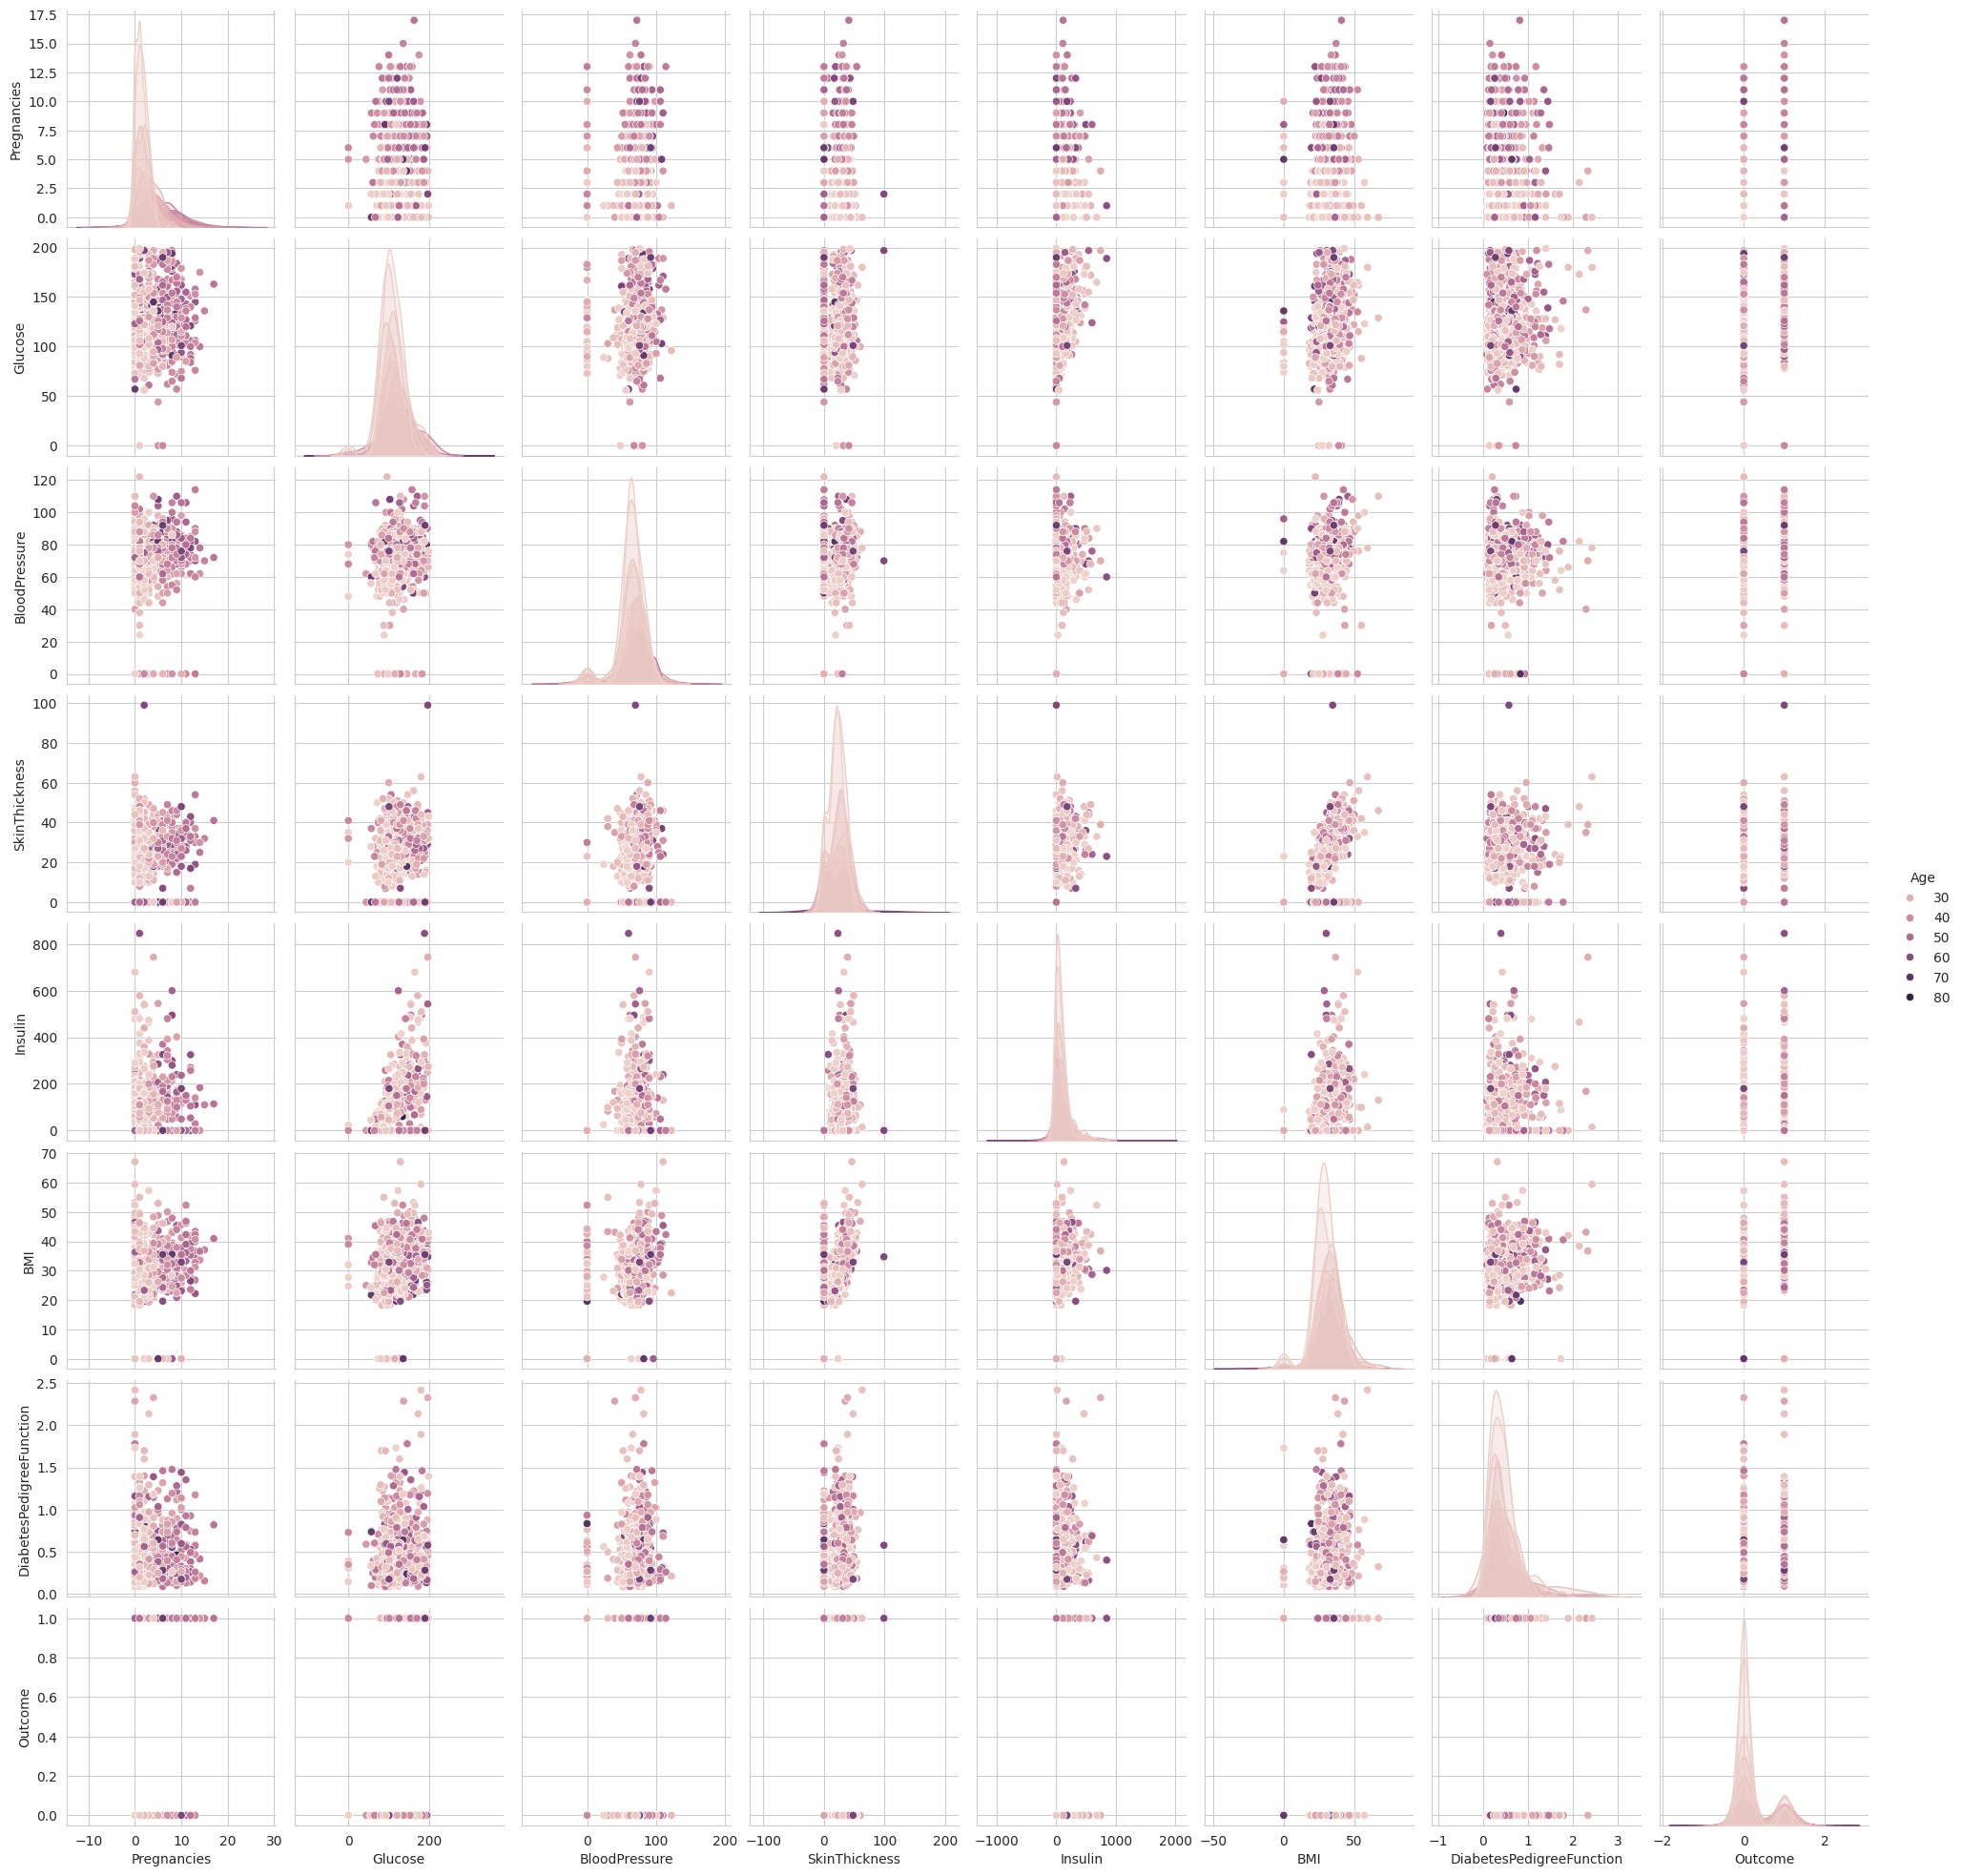

In [19]:
sns.pairplot(data=df,hue='Age')

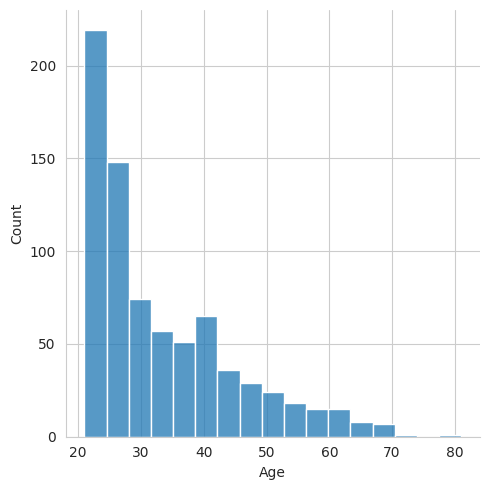

In [24]:
sns.displot(df['Age'],kde=False)

<Axes: ylabel='Frequency'>

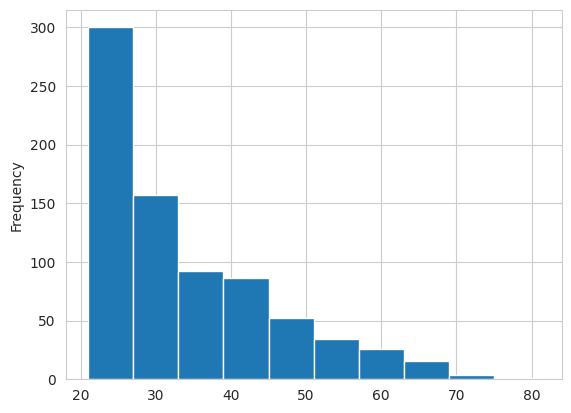

In [25]:
df['Age'].plot.hist(bins=10)

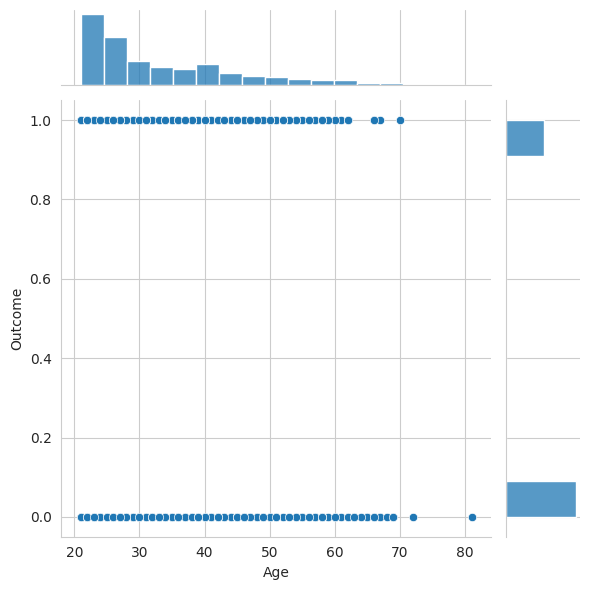

In [26]:
sns.jointplot(x='Age',y='Outcome',data=df)

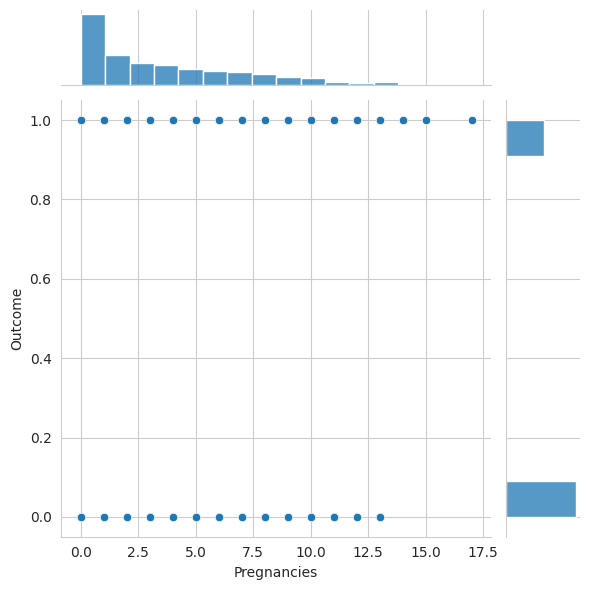

In [27]:
sns.jointplot(x='Pregnancies',y='Outcome',data=df)

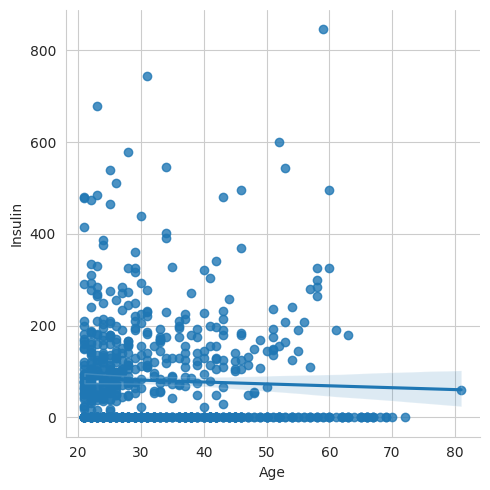

In [28]:
sns.lmplot(data=df,x='Age',y='Insulin')

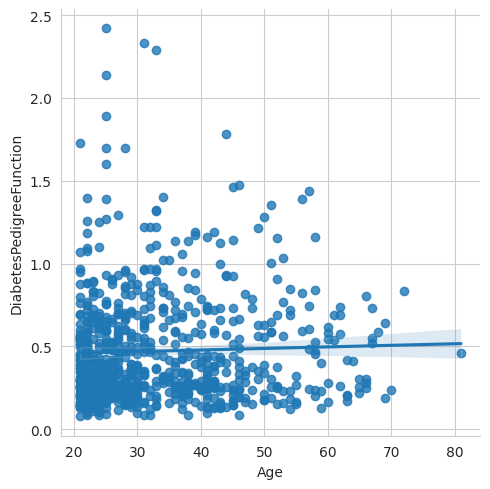

In [29]:
sns.lmplot(data=df,x='Age',y='DiabetesPedigreeFunction')

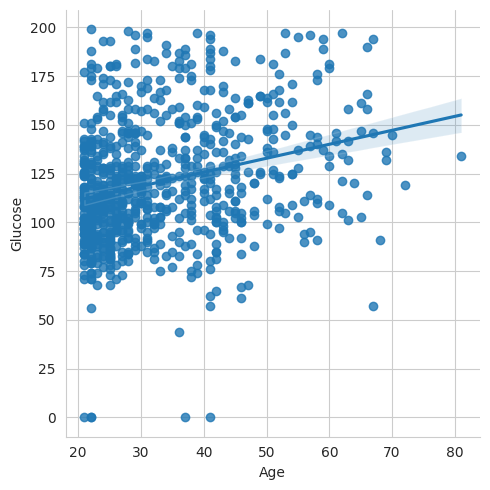

In [30]:
sns.lmplot(data=df,x='Age',y='Glucose')

<Axes: xlabel='Outcome', ylabel='Age'>

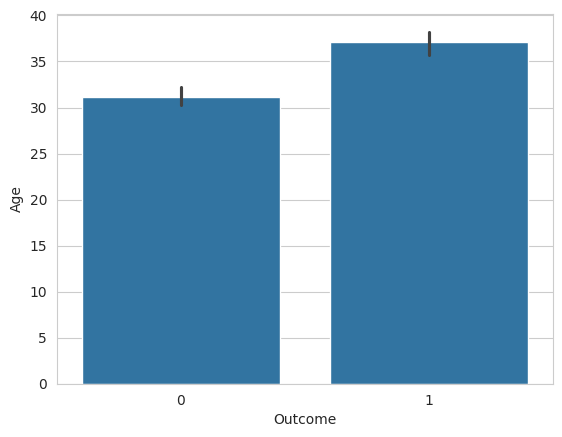

In [32]:
sns.barplot(data=df,x='Outcome',y='Age')

<Axes: xlabel='Age', ylabel='BMI'>

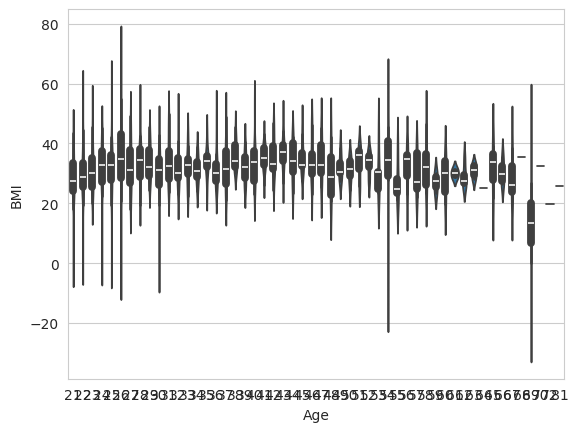

In [72]:
sns.violinplot(x='Age',y='BMI',data= df)

<Axes: >

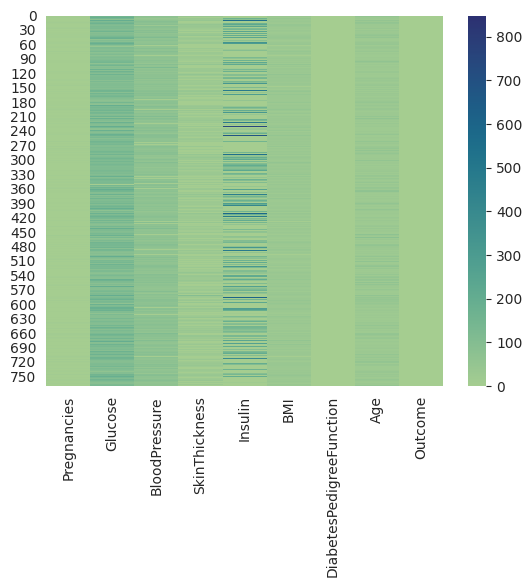

In [33]:
sns.heatmap(df,cmap="crest")

Divide x and y

In [34]:
x = df.drop(columns = 'Outcome',axis=1)
y = df['Outcome']

In [35]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm

Data Standardization

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(x)

StandardScaler()

In [41]:
standardized_data = scaler.transform(x)

In [42]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [43]:
x = standardized_data
y = df['Outcome']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [46]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [48]:
classifier = svm.SVC(kernel='linear')

In [49]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score of Training Data

In [52]:
# Accuracy score of Training data

from sklearn.metrics import accuracy_score

x_train_pred = classifier.predict(x_train)
train_data_accuracy = accuracy_score(x_train_pred,y_train)

In [53]:
train_data_accuracy

0.7866449511400652

Accuracy score of Testing Data

In [65]:
test_data_accuracy

0.7727272727272727

Making a Predictive System for each input


In [62]:
input = [6,148,72,35,0,33.6,0.627,50]

inp_nump = np.asarray(input)

inp_data_reshape = inp_nump.reshape(1,-1)

#Standardize the data
std_data = scaler.transform(inp_data_reshape)


prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==1):
  print('The person is Diabetic')
else:
  print('The person is Not Diabetic')

[1]
The person is Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
input = [3,126,88,41,235,39.3,0.704,27]

inp_nump = np.asarray(input)

inp_data_reshape = inp_nump.reshape(1,-1)

#Standardize the data
std_data = scaler.transform(inp_data_reshape)


prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==1):
  print('The person is Diabetic')
else:
  print('The person is Not Diabetic')

[0]
The person is Not Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
